# 2021/05/08 定期勉強会 データ分析演習

使用データ：[House prices](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](http://colab.research.google.com/github/e4rll/2021seminar/blob/master/LinearRegression.ipynb)

## ライブラリの読み込み
Pythonは標準のままで出来ることは少ないです。そこで「ライブラリ」という、機能をまとめたプログラムの集まりを環境にインポートすることで、Pythonで出来ることを増やします。

今回使用するライブラリは、データ解析・データ加工に優れた機能を追加する"[pandas](https://pandas.pydata.org/)"、効率的な数値計算をするための"[numpy](https://numpy.org/)"、グラフを描画するための拡張機能を追加する"[matplotlib](https://matplotlib.org/)"、そのmatplotlibをさらに拡張するための"[seaborn](https://seaborn.pydata.org/)"、さまざまな統計モデルを推定したり統計的検定などの機能を追加する"[statmodels](https://www.statsmodels.org/stable/index.html)"、数学・科学・工学のための数値解析のための"[scipy](https://www.scipy.org/)"の以上６つ。

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as sp

## データの読み込み
ライブラリをインポートしておくことでデータの読み込みから非常に簡単にすることができます。

読み込むデータは"train.csv"と"test.csv"の2ファイル。

In [ ]:
train_data =  pd.read_csv('https://github.com/e4rll/2021seminar/raw/master/input/train.csv')
test_data = pd.read_csv('https://github.com/e4rll/2021seminar/raw/master/input/test.csv')

ちなみにPythonに元々入っている標準ライブラリのみでデータを読み込もうとすると長くなります。
また、データを読み込んだ後にそのデータを操作しようとしたときに扱いにくいので、コチラで読み込むことはよほどの事情がなければ無いです。

In [ ]:
# import csv
# with open('input/train.csv', 'r') as csv_file:
#     csv_reader = csv.reader(csv_file)
#     list_of_rows = list(csv_reader)
#     print(list_of_rows)

### データの軽い確認

In [ ]:
train_data.head()

In [ ]:
test_data.head()

## 状況の確認

状況：

あなたは複数の住宅を保有する不動産屋さんです。

最近空き物件が多く、収益が落ちてきています。エリアの人口が減少している訳ではありません。そこで競合他社を調べてみると、売上高が伸びています。あなたの不動産屋では、ここ数年住宅の価格を変更していません。住宅価格の見直しをしなかったうちに、相場価格が変わってしまったのでしょう。

あなたは競合他社の住宅価格とその住宅の特徴をできるだけ集め、これらのデータから保有する住宅の価格の見直しをしたいと考えました。

また、価格に特に影響を与えている要因を調べることにより、今後価格変動の注意深く見るべき要因を特定する。

## 仮説の確認

仮説：住宅価格($)は、「敷地面積(square feet)」、「建築年・改築年からの経過年数(年)」、「地上以上の部屋数(部屋)」によって算出される。

## 使用する変数

| 変数名       | 概要             |
|--------------|------------------|
| SalePrice    | 住宅価格         |
| LotArea      | 敷地面積         |
| YearRemodAdd | 建築年・改築年   |
| TotRmsAbvGrd | 地上以上の部屋数 |
| YrSold       | 販売年           |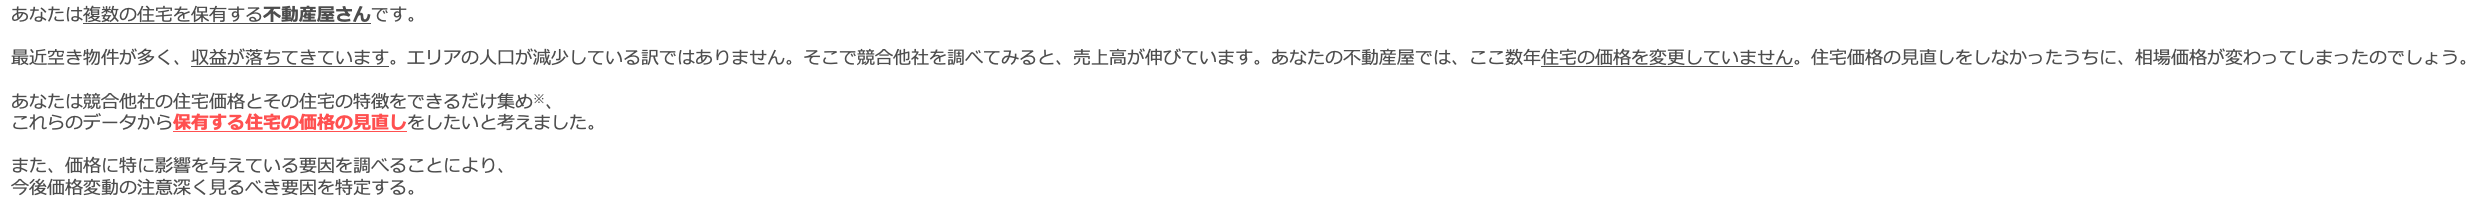

## データ収集
<br>
仮説に沿ったデータのみを抽出する。

In [ ]:
train_data = train_data[['SalePrice', 'LotArea', 'YearRemodAdd', 'TotRmsAbvGrd', 'YrSold']]

### データの確認
<br>
変数の数とデータ件数の確認。

In [ ]:
print('(行数, 列数) = ', train_data.shape)

抽出したデータのみのデータ確認。

In [ ]:
train_data.head()

データの情報を確認する。

In [ ]:
train_data.info()

### 欠損値の確認

In [ ]:
print('Train columns with null values: {} \n' .format(train_data.isnull().sum()))

### データの基礎統計量の確認
<br>
・項目の説明

count: 要素の個数

mean: 平均

std: 標準偏差

min: 最小値

25%: 第一四分位数

75%: 第三四分位数

50%: 中央値 (median)

max: 最大値

In [ ]:
train_data.describe()

相関係数の算出

In [ ]:
train_corr = train_corr = train_data.corr()
display(train_corr)

相関係数を見やすく。

In [ ]:
sns.set_context('talk')
fig = plt.subplots(figsize = (8, 8))
 
sns.heatmap(train_corr, annot = True, fmt = '.2f', cmap = 'Blues', square = True)

全体のヒストグラムと散布図の描画。

In [ ]:
sns.pairplot(train_data)

### 目的変数のみ確認

ヒストグラム描画

In [ ]:
%matplotlib inline
train_data['SalePrice'].hist(bins = 50, figsize = (10, 7.5))
plt.rcParams['figure.figsize'] = [20, 15]

箱ひげ図描画

In [ ]:
%matplotlib inline
fig_o, ax_o = plt.subplots(figsize=(9.6, 5))
ax_o.set_title('Box Plot')
ax_o.boxplot(train_data['SalePrice'], vert = False,  labels=['SalePrice'])
plt.rcParams['figure.figsize'] = [20, 15]

目的変数が正規分布に従っていないことを確認しておく。

### 説明変数のみ確認

ヒストグラム描画

In [ ]:
%matplotlib inline
train_data[['LotArea', 'YearRemodAdd', 'TotRmsAbvGrd', 'YrSold']].hist(bins=50, figsize=(15,7.5))
plt.rcParams['figure.figsize'] = [20, 15]

## データ加工

### 変数の作成
<br>
仮説では、「建築年・改築年からの経過年数(年)」が住宅価格に影響を与えているとしていたので、「経過年数」という変数を作成する。

それに伴い、元データの「建築年・改築年」、「販売年」という変数を削除する。

In [ ]:
train_data['ElapYr'] = train_data['YrSold'] - train_data['YearRemodAdd']
train_data.drop(['YearRemodAdd', 'YrSold'], axis = 1, inplace = True)

データの再確認

In [ ]:
train_data.head()

In [ ]:
train_corr = train_corr = train_data.corr()
display(train_corr)

In [ ]:
sns.set_context('talk')
fig = plt.subplots(figsize = (8, 8))
 
sns.heatmap(train_corr, annot = True, fmt = '.2f', cmap = 'Blues', square = True)

In [ ]:
sns.pairplot(train_data)

### 外れ値対処

In [ ]:
%matplotlib inline
fig_o, ax_o = plt.subplots(figsize=(9.6, 5))
ax_o.set_title('Box Plot')
ax_o.boxplot(train_data['LotArea'], vert = False,  labels=['LotArea'])
plt.rcParams['figure.figsize'] = [20, 15]

外れ値の除去。

In [ ]:
train_data.query('LotArea <= 39000', inplace = True)

In [ ]:
%matplotlib inline
train_data['LotArea'].hist(bins = 50, figsize = (10, 7.5))
plt.rcParams['figure.figsize'] = [20, 15]

In [ ]:
train_corr = train_corr = train_data.corr()
display(train_corr)

In [ ]:
sns.set_context('talk')
fig = plt.subplots(figsize = (8, 8))
 
sns.heatmap(train_corr, annot = True, fmt = '.2f', cmap = 'Blues', square = True)

「敷地面積」の外れ値を除去したら、「敷地面積」と「地上以上の部屋数」間に多重共線性(マルチコ)がありそうに見えてきましたが、今回は取り敢えず無視します。

In [ ]:
sns.pairplot(train_data)

## 回帰分析

一旦データを再確認する。

In [ ]:
train_data.head()

In [ ]:
train_data.info()

In [ ]:
train_data.describe()

In [ ]:
%matplotlib inline
np.log(train_data['SalePrice']).hist(bins = 50, figsize = (10, 7.5))
plt.rcParams['figure.figsize'] = [20, 15]

### モデル構築
<br>
・目的変数：

SalePrice - 住宅価格
<br><br>
・説明変数：

LotArea - 敷地面積

TotRmsAbvGrd - 地上以上の部屋数

ElapYr - 経過年数
<br><br>
#### モデル式
$ {\rm SalePrice} = \beta_0 + {\rm LotArea} \: \times \beta_1 + {\rm TotRmsAbvGrd} \: \times \beta_2 + {\rm ElapYr} \: \times \beta_3 $

In [ ]:
x = train_data[['LotArea', 'TotRmsAbvGrd', 'ElapYr']]
y = np.log(train_data['SalePrice'])
X = sm.add_constant(x)

model = sm.OLS(y, X)
result = model.fit()
result.summary()

### 着目する値
<br>
・Adj. R-squared: 自由度調整済み決定係数

・Prob (F-statistic): モデルに対するF検定の有意確率

・coef: 偏回帰係数

・P>|t|: 偏回帰係数に対するt検定の有意確率

・（必要に応じて）AIC: 赤池情報量基準

・（必要に応じて）BIC: ベイズ情報量基準

### 自社データに適応させる

In [ ]:
test_data = pd.read_csv('input/test.csv')
test_data = test_data[['LotArea', 'YearRemodAdd', 'TotRmsAbvGrd', 'YrSold']]
test_data['ElapYr'] = test_data['YrSold'] - test_data['YearRemodAdd']
test_data.drop(['YearRemodAdd', 'YrSold'], axis = 1, inplace = True)
test_data.query('LotArea <= 39000', inplace = True)

In [ ]:
test_data.head()

In [ ]:
pd.DataFrame(result.params)

In [ ]:
test_data['pred_val'] = result.params['const'] + \
    test_data['LotArea'] * result.params['LotArea'] + \
    test_data['TotRmsAbvGrd'] * result.params['TotRmsAbvGrd'] + \
    test_data['ElapYr'] * result.params['ElapYr']

In [ ]:
test_data['pred_val'] = np.exp(test_data['pred_val'])

### 予測された自社保有住宅価格

In [ ]:
pd.DataFrame(test_data['pred_val'])

## 影響度比較

In [ ]:
x = train_data[['LotArea', 'TotRmsAbvGrd', 'ElapYr']]
y = np.log(train_data['SalePrice'])
y.reset_index(inplace=True, drop=True)
x_n = pd.DataFrame(sp.stats.zscore(x, axis=0), \
                   columns=['LotArea', 'TotRmsAbvGrd', 'ElapYr'])
X_n = sm.add_constant(x_n)

model = sm.OLS(y, X_n)
result = model.fit()
result.summary()